# Presentacion del dataset
En este trabajo utilizaré un dataset que contiene las ventas de una gran cadena de supermercados. El dataset ha sido obtenido en el sitio web kaggle.com, donde luego de una investigación de varios datasets y teniendo en cuenta mi interés por el marketing basado en datos, elegí el dataset de ventas de una cadena de supermercados.

El dataset cuenta con 21 columnas y 9994 filas, entre las columnas, se encuentran variables interesantes como:


- “Order Date” $\rightarrow$ Fecha de orden del producto
- “Segment” $\rightarrow$ El segmento al que el cliente o “Customer” (Customer ID) pertenece
- “Product ID” $\rightarrow$ Identificador del producto
- “Category” $\rightarrow$ Categoría del producto que fue ordenado
- “Sub-category” $\rightarrow$ Subcategoría del producto que fue ordenado


# Definición de objetivo
- Crear un modelo de Regresión para predecir la cantidad de stock necesario para una cierta fecha, como puede ser Navidad, Año Nuevo, o alguna otra fecha que se llegue a descubrir con el EDA.
- Ayudar a crear una campaña de marketing que esté direccionada a un segmento en particular y entender que productos se deben promocionar.


# Contexto comercial
El contexto comercial de este trabajo se centra en optimizar las ventas de la cadena de supermercados, sobre todo en las fechas claves del año. Esto es importante, ya que en esos momentos cruciales del año se logra un incremento de ingresos significativo, una mayor fidelización de los clientes y mejorar la rentabilidad, compensado los periodos de menor actividad en el año. Es por ello que al anticipar la demanda, los supermercados pueden gestionar mejor su inventario, evitando excesos o faltas en el stock de productos.



In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Crearé una funcion para obtener de nuevo el dataset, ya que puede ser util en caso de que se presente un bug o necesite los datos limpios en algun momento.

In [45]:
def get_data():
  return pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Sample - Superstore.csv", encoding='windows-1252')


In [46]:
df = get_data()

# EDA

In [47]:
df.shape

(9994, 21)

In [48]:
df.sample(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
6809,6810,CA-2017-156237,9/14/2017,9/15/2017,First Class,PS-18760,Pamela Stobb,Consumer,United States,Philadelphia,...,19140,East,OFF-BI-10000301,Office Supplies,Binders,GBC Instant Report Kit,3.882,2,0.7,-2.5880
5569,5570,CA-2017-157966,3/13/2017,3/13/2017,Same Day,SU-20665,Stephanie Ulpright,Home Office,United States,Chicago,...,60610,Central,OFF-PA-10001934,Office Supplies,Paper,Xerox 1993,15.552,3,0.2,5.6376
2622,2623,CA-2014-164861,12/3/2014,12/6/2014,Second Class,MC-17635,Matthew Clasen,Corporate,United States,Saint Louis,...,63116,Central,OFF-PA-10001972,Office Supplies,Paper,Xerox 214,25.920,4,0.0,12.4416
9259,9260,CA-2014-168368,2/11/2014,2/15/2014,Second Class,GA-14725,Guy Armstrong,Consumer,United States,Columbia,...,65203,Central,OFF-ST-10002583,Office Supplies,Storage,Fellowes Neat Ideas Storage Cubes,64.960,2,0.0,2.5984
3345,3346,CA-2016-145982,8/27/2016,9/1/2016,Second Class,TB-21055,Ted Butterfield,Consumer,United States,Quincy,...,2169,East,OFF-FA-10000735,Office Supplies,Fasteners,Staples,11.680,4,0.0,5.2560


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

 ``` Order Date ``` y ``` Ship Date ``` deberian ser de tipo ``` datetime ```

In [50]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [51]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Podemos ver que el dataset no presenta datos nulos

## Chequeamos las estadísticas de las columnas con valores numéricos

In [52]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Chequeamos las estadísticas de las columnas con valores categóricos

In [53]:
numerical_columns = df._get_numeric_data().columns
categorical_columns = list(set(df.columns) - set(numerical_columns))

for col in categorical_columns:
  print(col)
  print("-"*len(col))
  print(df[col].value_counts(), "\n")

Country
-------
United States    9994
Name: Country, dtype: int64 

Region
------
West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64 

Product ID
----------
OFF-PA-10001970    19
TEC-AC-10003832    18
FUR-FU-10004270    16
FUR-CH-10001146    15
TEC-AC-10003628    15
                   ..
TEC-PH-10003535     1
TEC-MA-10002937     1
OFF-AR-10004974     1
TEC-AC-10004814     1
OFF-ST-10001627     1
Name: Product ID, Length: 1862, dtype: int64 

Customer Name
-------------
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Lela Donovan            1
Anthony O'Donnell       1
Carl Jackson            1
Ricardo Emerson         1
Jocasta Rupert          1
Name: Customer Name, Length: 793, dtype: int64 

City
----
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Gle

- Solo hay un país en la columna ``` Country ``` - Es redundante
- La mayoría de los productos son
  - Materiales de oficina
  - Muebles
- La mayoria de los clientes usan envío standard
- Row ID es un índice innecesario
- ¿Los clientes pertenencientes al segmento "Corporate" traeran mayores beneficios que los clientes normales?

- El unico pais que registra ventas es Estados unidos
- Row ID es un indice innecesario

In [54]:
df.drop('Row ID', axis=1, inplace=True)
df.drop('Country', axis=1, inplace=True)

In [55]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

## ¿Cuál segmento de cliente traerá las mayores ganancias?
- La hipótesis es que el segmento corporate, a pesar de generar menos ventas que el segmento consumer, traera mayores ganancias.

In [56]:
segment_profit = df.groupby("Segment")['Profit'].sum().round()
segment_sales = df.groupby("Segment")['Order ID'].nunique()
segment_profit_sales = pd.concat([segment_profit, segment_sales], axis=1)
segment_profit_sales.rename({"Profit":"Total_Profit", "Order ID":"Sales_Count"}, inplace=True, axis=1)
segment_profit_sales

,Total_Profit,Sales_Count
Segment,,
Consumer,134119.0,2586
Corporate,91979.0,1514
Home Office,60299.0,909


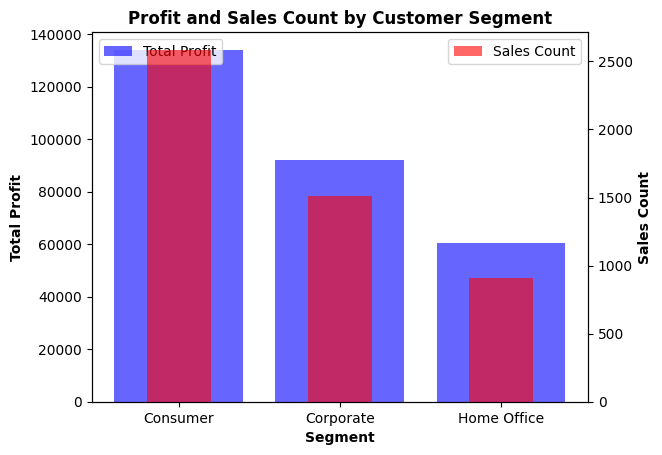

In [57]:
fig, ax1 = plt.subplots()

profit_bars = ax1.bar(segment_profit_sales.index, segment_profit_sales['Total_Profit'], color='b', alpha=0.6, label='Total Profit')

ax2 = ax1.twinx()
sales_bars = ax2.bar(segment_profit_sales.index, segment_profit_sales['Sales_Count'], color='r', alpha=0.6, label='Sales Count', width=0.4)

ax1.set_xlabel('Segment', fontweight='bold')
ax1.set_ylabel('Total Profit', fontweight='bold')
ax2.set_ylabel('Sales Count', fontweight='bold')
ax1.set_title('Profit and Sales Count by Customer Segment', fontweight='bold')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')


plt.show()

Parece que el segmento Consumer produce un mayor profit, pero en promedio, **¿quién produce mas profit por venta?**

In [58]:
segment_profit_sales['Average_Profit_Per_Sale'] = segment_profit_sales['Total_Profit'] / segment_profit_sales['Sales_Count']
segment_profit_sales.sort_values('Average_Profit_Per_Sale', ascending=False)


,Total_Profit,Sales_Count,Average_Profit_Per_Sale
Segment,,,
Home Office,60299.0,909,66.335534
Corporate,91979.0,1514,60.752312
Consumer,134119.0,2586,51.863496


Home Office es el segmento que mayor porfit por venta produce

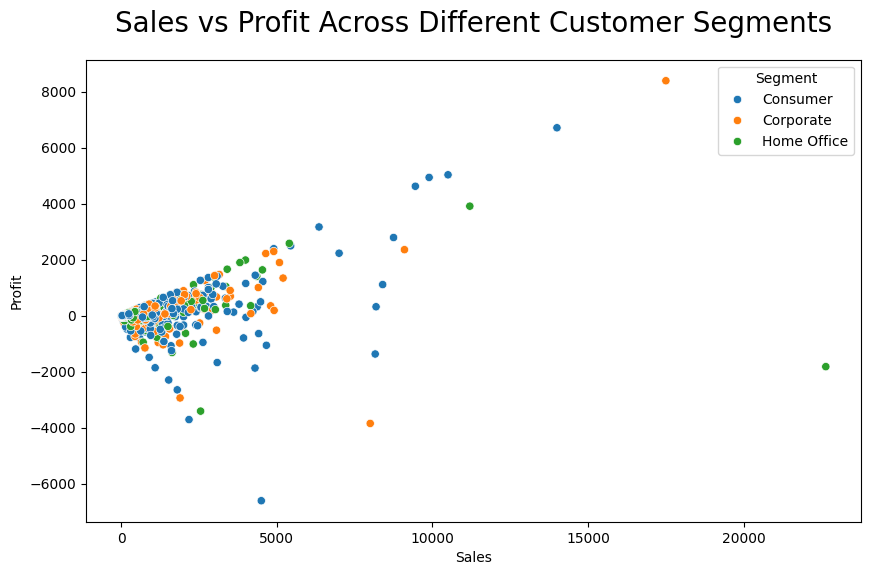

In [59]:
df_scatter = df[['Sales','Profit','Segment']]

plt.figure(figsize=[10,6])

sns.scatterplot(x=df_scatter['Sales'], y=df_scatter['Profit'], hue=df_scatter['Segment'], legend='auto')
plt.title("Sales vs Profit Across Different Customer Segments", size=20, pad=20)
plt.show()

- El segmento "Corporate" ha tenido las ventas con mayor profit
- El segmento "Consumer" ha tenido las ventas con mayor profit negativo
- El segmento "Home Office" ha tenido la mayor cantidad de ventas

## ¿Qué días del año se producen las mayores ventas?

In [60]:
sales_by_day_month = df.groupby([df['Order Date'].dt.day, df['Order Date'].dt.month]).size().sort_values(ascending=False)
sales_by_day_month.head(10)

Order Date  Order Date
1           12            83
24          11            81
2           9             71
10          11            70
11          12            68
12          11            68
17          9             68
20          11            68
3           11            66
2           12            65
dtype: int64

In [61]:
sales_by_day_month.index.names = ["Day", "Month"]
sales_by_day_month

Day  Month
1    12       83
24   11       81
2    9        71
10   11       70
11   12       68
              ..
1    2         3
10   2         3
12   2         3
18   1         1
29   2         1
Length: 366, dtype: int64

In [62]:
df_sales = sales_by_day_month.reset_index()
df_sales.columns = ['Day', 'Month', 'Sales']
df_sales['Date'] = pd.to_datetime(df_sales[['Day', 'Month']].assign(YEAR=2000))
df_sales.sort_values('Date', inplace=True)



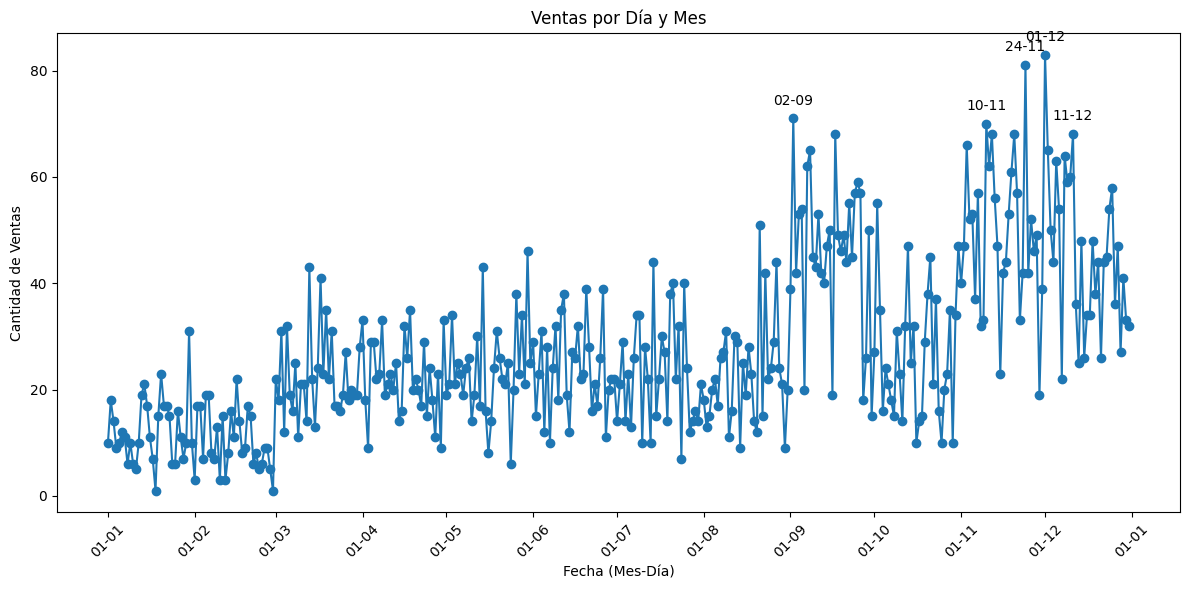

In [63]:
import matplotlib.dates as mdates

top_days = df_sales.sort_values('Sales', ascending=False).head(5)

plt.figure(figsize=(12, 6))
plt.plot_date(df_sales['Date'], df_sales['Sales'], linestyle='-')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

for _, row in top_days.iterrows():
    plt.annotate(row['Date'].strftime('%d-%m'),
                 (row['Date'], row['Sales']),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

plt.xticks(rotation=45)

plt.title('Ventas por Día y Mes')
plt.xlabel('Fecha (Mes-Día)')
plt.ylabel('Cantidad de Ventas')

plt.tight_layout()
plt.show()


A finales de año hay una evidente suba de ventas, donde los cinco dias con mayores ventas fueron los siguientes:


**1.** 01-12


**2.** 24-11


**3.** 02-09


**4.** 10-11


**5.** 11-12

Crear una estrategia de marketing para maximizar las ventas en estos días sería ideal.

## ¿Qué categoría de productos produce la mayor cantidad de ventas?

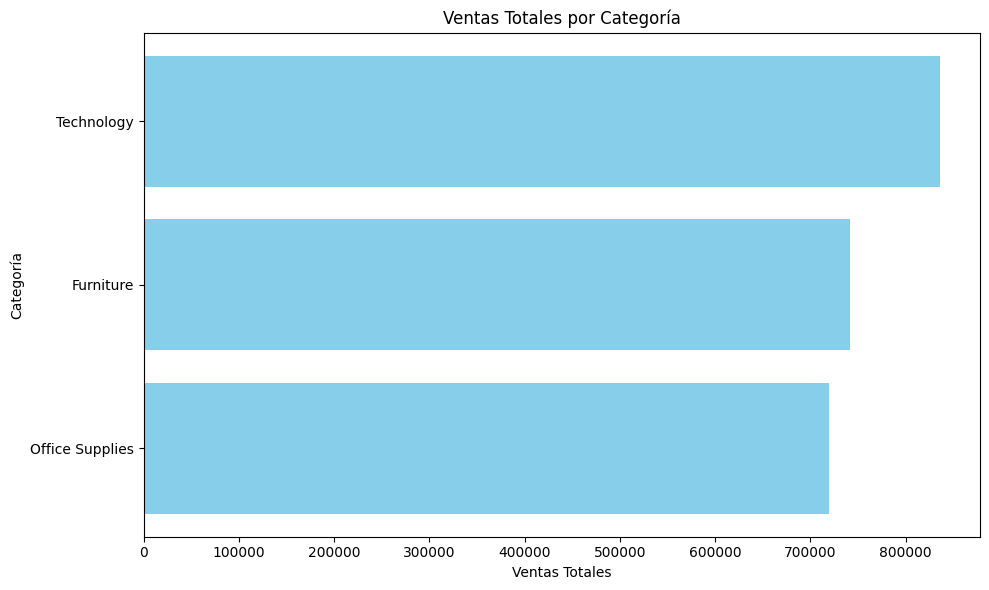

In [64]:
group_category = df.groupby('Category')['Sales'].sum().sort_values(ascending=True).reset_index()
plt.figure(figsize=(10, 6))
plt.barh(group_category.Category, group_category.Sales, color='skyblue')
plt.xlabel('Ventas Totales')
plt.ylabel('Categoría')
plt.title('Ventas Totales por Categoría')
plt.tight_layout()
plt.show()
